In [166]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_row',111) # afficher toutes les row

url = 'https://raw.githubusercontent.com/MachineLearnia/Python-Machine-Learning/master/Dataset/dataset.csv'
data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")

In [167]:
data.describe()
df=data.copy()


# NOTES :

            ## ANALYSE DE FORME
               TARGET : SARS-Cov-2 exam result	
               LINGE COLONE :  5644, 110
               TYPES DE VARS : quantitatives : 70 | qualitatives : 40
               ANALYSE DE VAR MANQ : BECOUP DE NAN (tres grand nombre de variable > 90% qui ont NAN)    2 GROUPES DES DONNES        76%->TEST VIRAL    89% -> TAUX DE SANGUINS
            ## ANALYSE DE FOND
               VISUAL DE TARGET :10% de cas positive
               SIGNIFICATION DE VAR : variavle contine standardise , asymetrique , test sanguin
                                 variable qualitatve : viral Rinhovirus qui semble tres elevee
               RELATION VAR ET TARGET:
                     - target /blood : le taux de nonocytes , platelets , leukocytes semblent liees au covid
                     - target / age  : les indiv de faible age sont tres peu contamine ? attention en ne connait pas l'age est on sait pas de quand
                     - target / viral : les doubles maladies sont tres rares
                     - hosp / blood : interssant pour predire dans chaque quelle service dois entree


            ## ANALYSE PLUS DETAILLE
               RELATION VAR/VAR

                  blood_data / blood_data : certain variable sont tres correlees 
                  blood_data / age : tres faible correlation entre l'age et taux sanuin
                  viral / viral : INFLUANZA rapide test est tres peu fiable en peut le laisser tomber
                  maladie / blood data : le taux sanguins entre malades ey=t covid-19 sont differents

            
                  
            Test hypothese :
               - les individus atteints par covid-19 ont des taux de leukocytes , Monocytes , Platelets significativement differents
                           H0 : les taux moiyennes sans egaus chez les individus pos est negatif


<AxesSubplot:ylabel='None'>

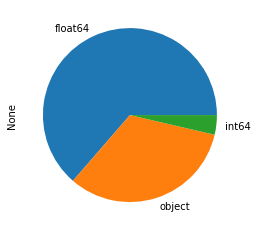

In [168]:
df.dtypes.value_counts().plot.pie()

<AxesSubplot:ylabel='Patient ID'>

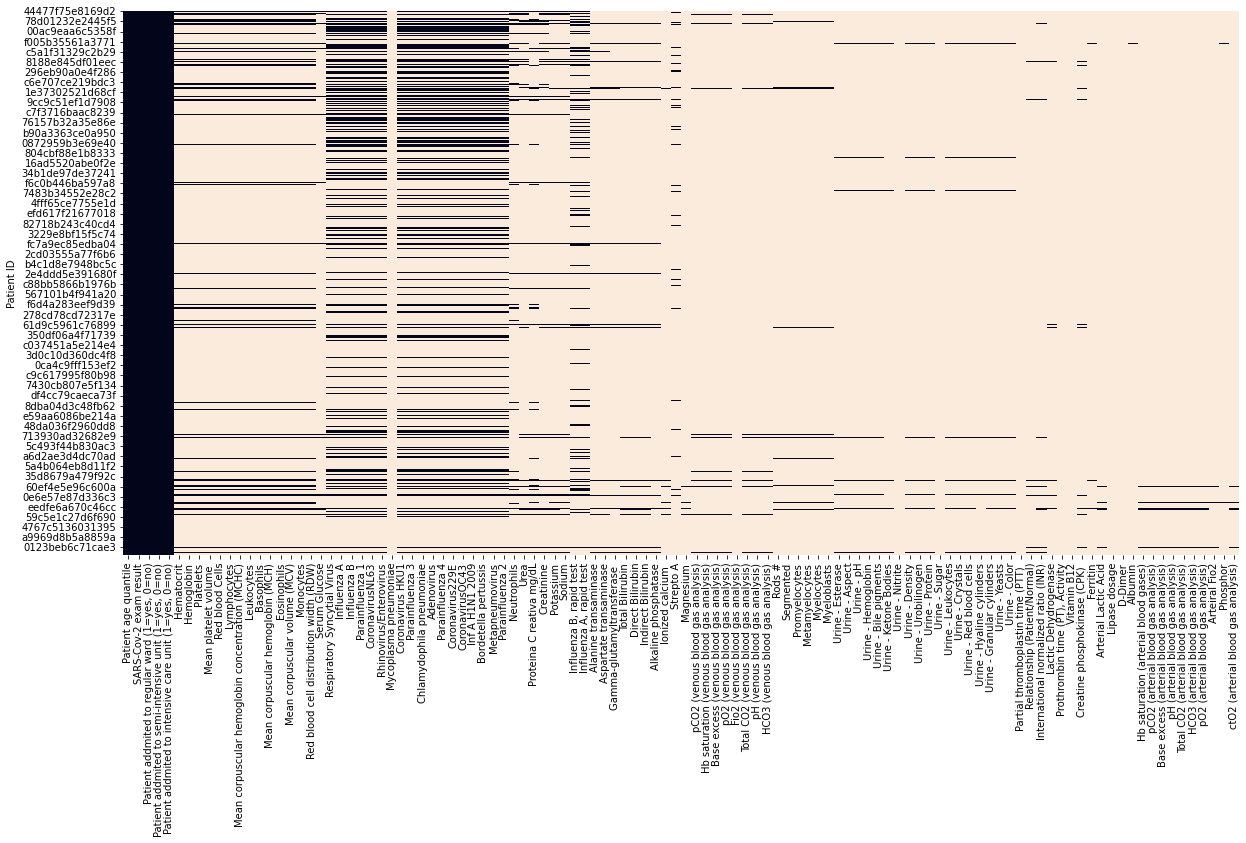

In [169]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [170]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Respiratory Syncytial Virus                              0.760099
Influenza A                                              0.760099
Rhinovirus/Enterovirus                                   0.760454
Inf A H1N1 2009                                          0.760454
CoronavirusOC43                                          0.760454
Coronavirus229E                                          0.760454
Parainfluenza 4                                          0.760454
Adenovirus                                               0.760454
Chlamydophila pneumoniae                                 0.760454
Parainflue

## ANALYSE DE FOND
    

    ELIMINATION DES COLONES UNUTILES

In [171]:
df =df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]
df.head()

Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
44477f75e8169d2                    13               negative   
126e9dd13932f68                    17               negative   
a46b4402a0e5696                     8               negative   
f7d619a94f97c45                     5               negative   
d9e41465789c2b5                    15               negative   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
44477f75e8169d2                                               0   
126e9dd13932f68                                               0   
a46b4402a0e5696                                               0   
f7d619a94f97c45                                               0   
d9e41465789c2b5                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
44477f75e8169d2         NaN         NaN        NaN                    NaN   
126e9dd13932f68    0.236515    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN         NaN        NaN                    NaN   
f7d619a94f97c45         NaN         NaN        NaN                    NaN   
d9e41465789c2b5         NaN         NaN        NaN                    NaN   

                 Red blood Cells  ...    Adenovirus  Parainfluenza 4  \
Patient ID                        ...                                  
44477f75e8169d2              NaN  ...           NaN              NaN   
126e9dd13932f68         0.102004  ...  not_detected     not_detected   
a46b4402a0e5696              NaN  ...           NaN              NaN   
f7d619a94f97c45              NaN  ...           NaN              NaN   
d9e41465789c2b5              NaN  ...  not_detected     not_detected   

                 Coronavirus229E  CoronavirusOC43  Inf A H1N1 2009  \
Patient ID                                                           
44477f75e8169d2              NaN              NaN              NaN   
126e9dd13932f68     not_detected     not_detected     not_detected   
a46b4402a0e5696              NaN              NaN              NaN   
f7d619a94f97c45              NaN              NaN              NaN   
d9e41465789c2b5     not_detected     not_detected     not_detected   

                 Bordetella pertussis  Metapneumovirus  Parainfluenza 2  \
Patient ID                                                                
44477f75e8169d2                   NaN              NaN              NaN   
126e9dd13932f68          not_detected     not_detected     not_detected   
a46b4402a0e5696                   NaN              NaN              NaN   
f7d619a94f97c45                   NaN              NaN              NaN   
d9e41465789c2b5          not_detected     not_detected     not_detected   

<AxesSubplot:ylabel='Patient ID'>

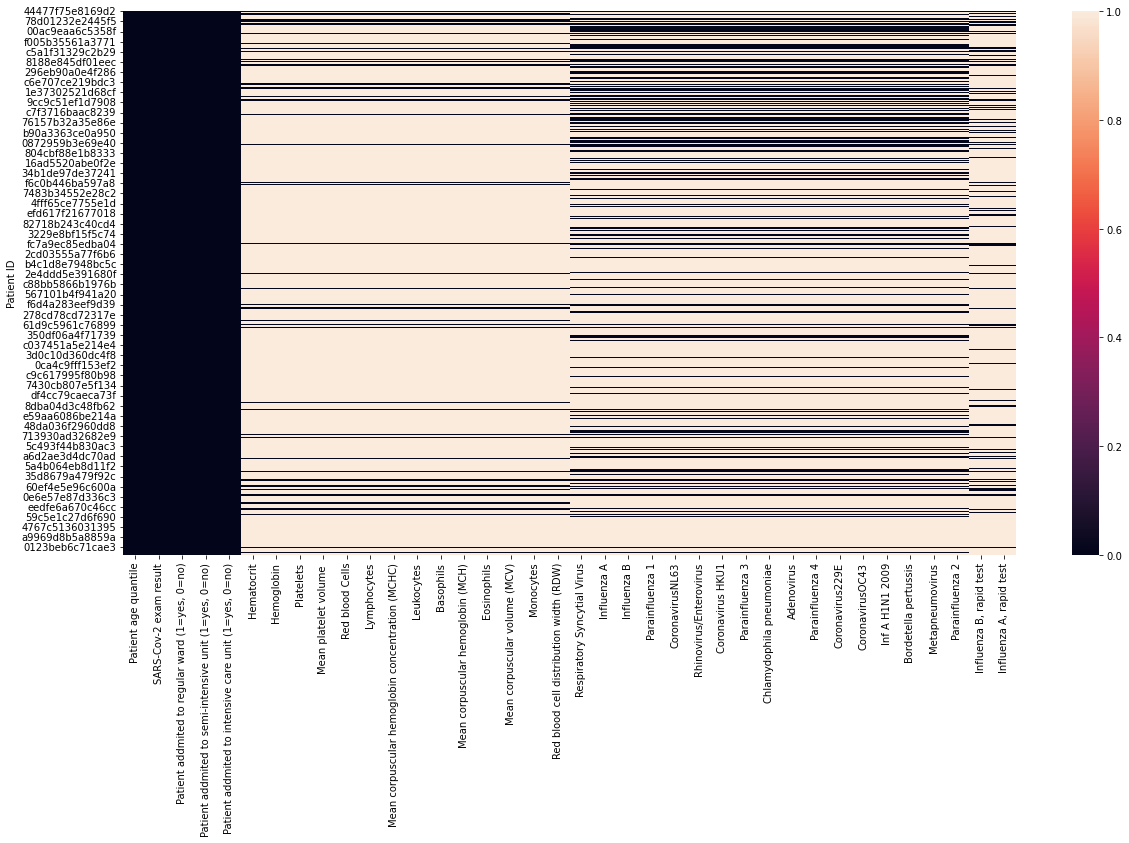

In [172]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [173]:
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

d:\programe\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\programe\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\programe\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

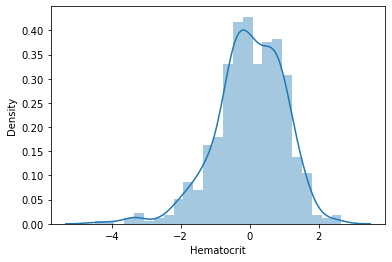

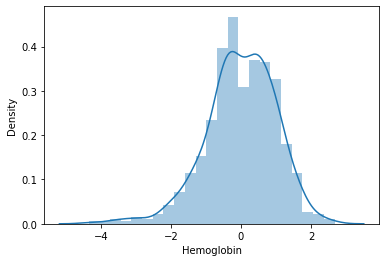

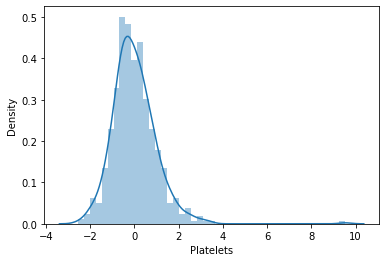

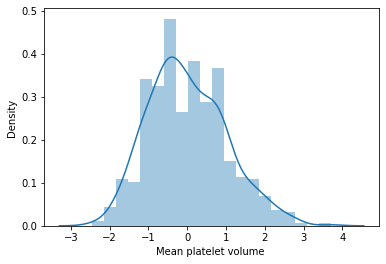

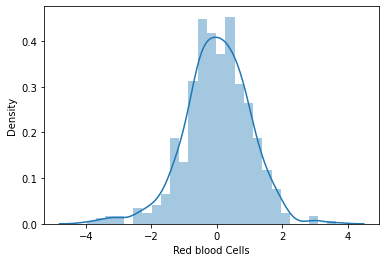

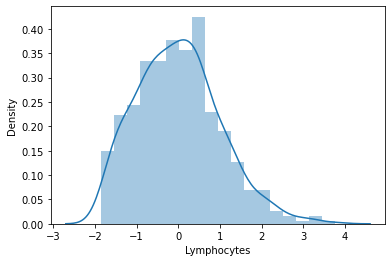

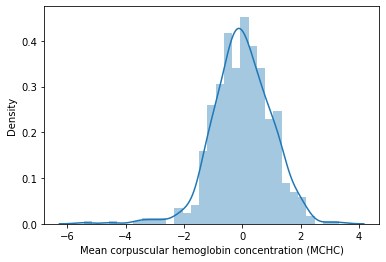

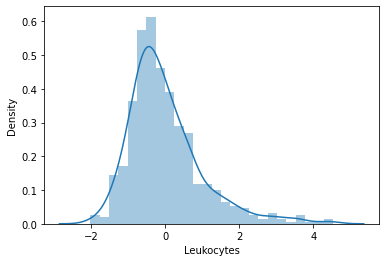

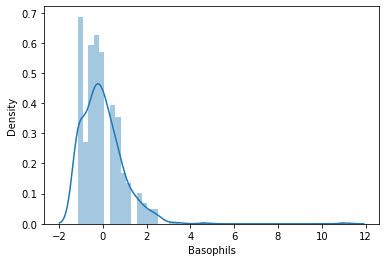

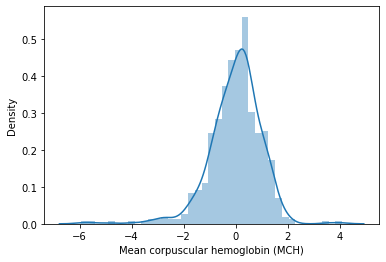

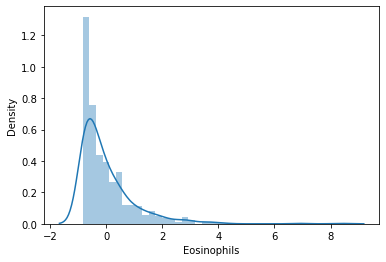

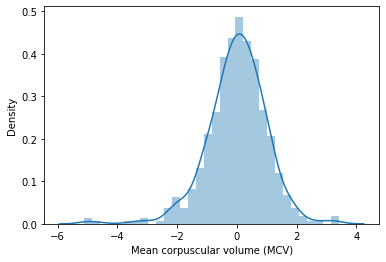

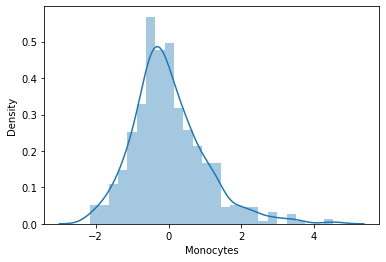

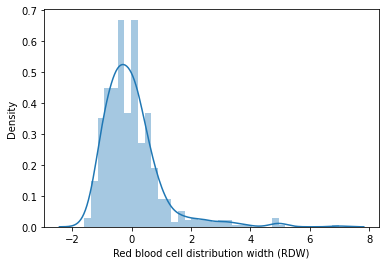

In [174]:
for col in df.select_dtypes('float'):
    plt.figure()   # pour creer chaque courbe dans un figure differents
    sns.distplot(df[col])
plt.show()

d:\programe\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Patient age quantile', ylabel='Density'>

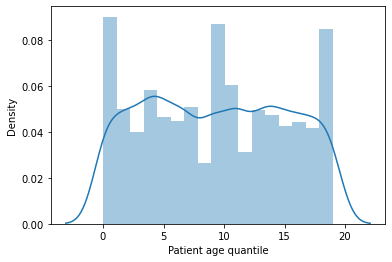

In [175]:
sns.distplot(df['Patient age quantile'])

In [176]:
df['Patient age quantile'].value_counts()

11    380
4     366
9     359
0     334
7     319
2     315
13    313
14    299
5     294
6     281
16    279
19    275
15    269
17    263
18    259
3     251
1     234
12    197
10    190
8     167
Name: Patient age quantile, dtype: int64

# Variable Qualitative

In [177]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')


SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

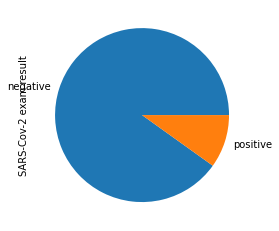

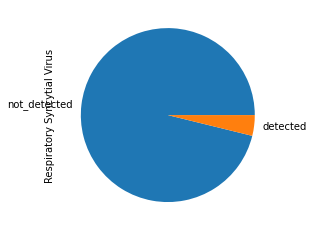

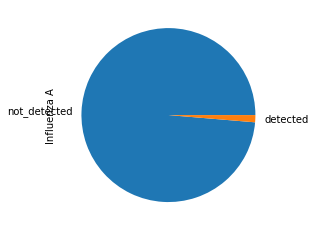

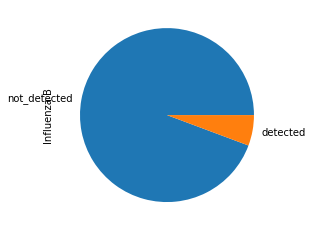

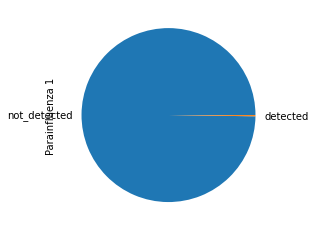

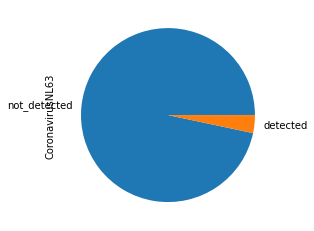

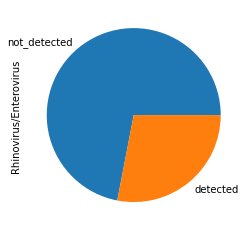

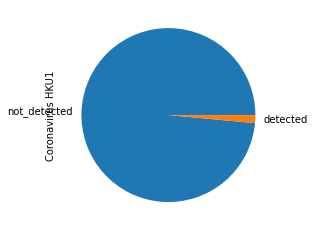

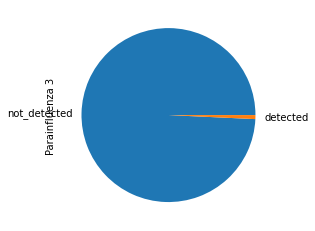

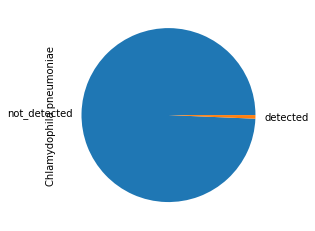

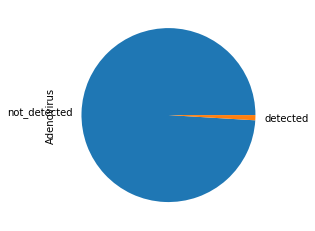

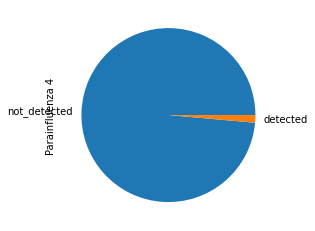

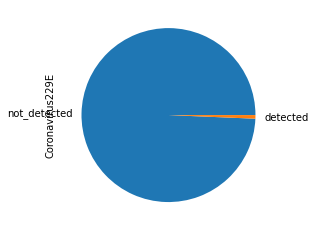

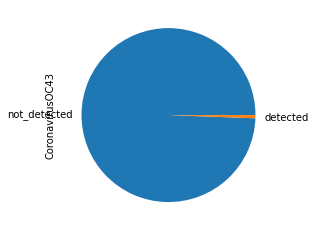

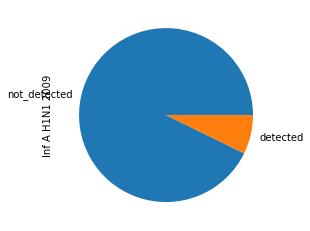

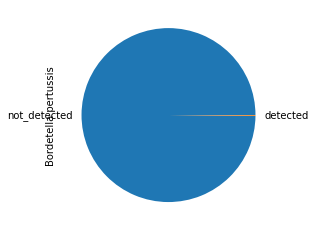

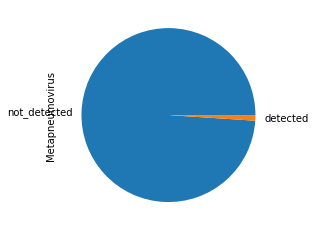

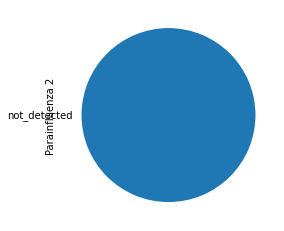

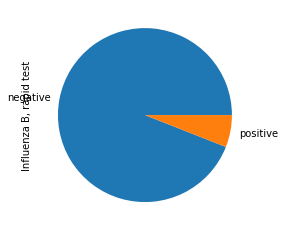

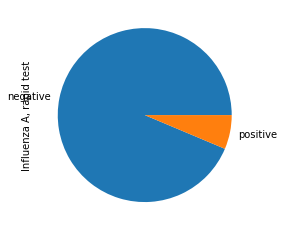

In [178]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()


# Relation Target / VAR

CREATION DES SOUS ENSEMBLE POS/NEG

In [179]:
positif_df = df[df['SARS-Cov-2 exam result']=='positive']
negatif_df = df[df['SARS-Cov-2 exam result']=='negative']



In [180]:
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = df.columns[(missing_rate<0.9) & (missing_rate > 0.88) ]
viral_columns = df.columns[(missing_rate<0.88) & (missing_rate > 0.75) ]

## Target / BLOOD

d:\programe\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\programe\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\programe\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

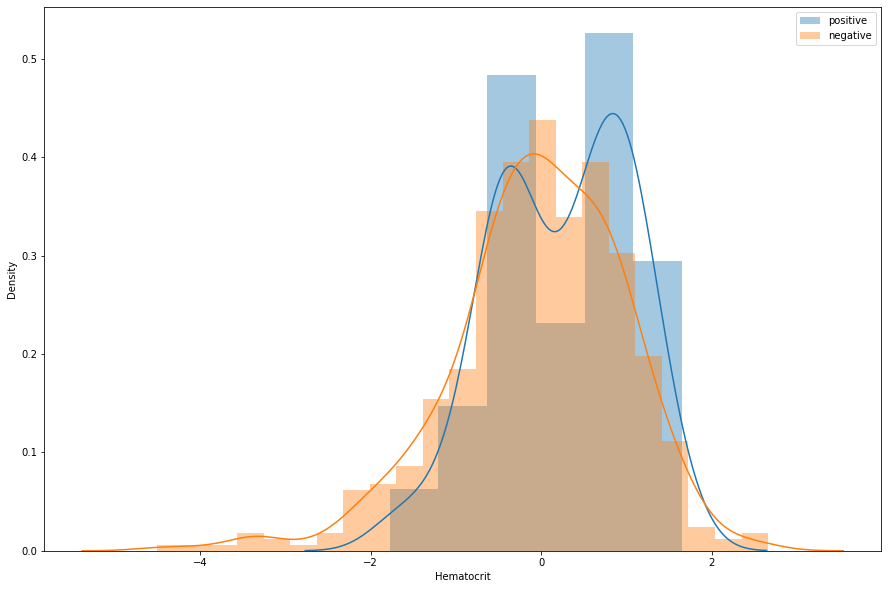

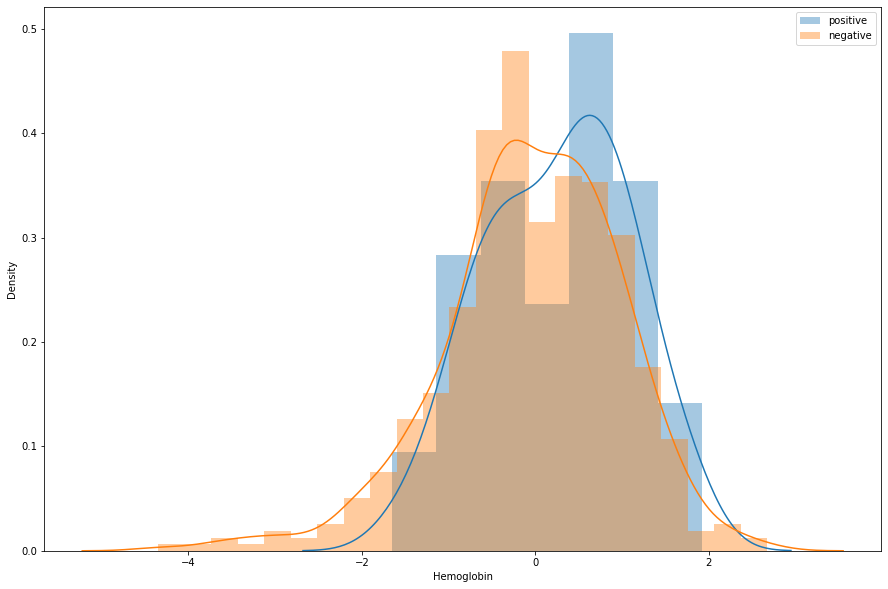

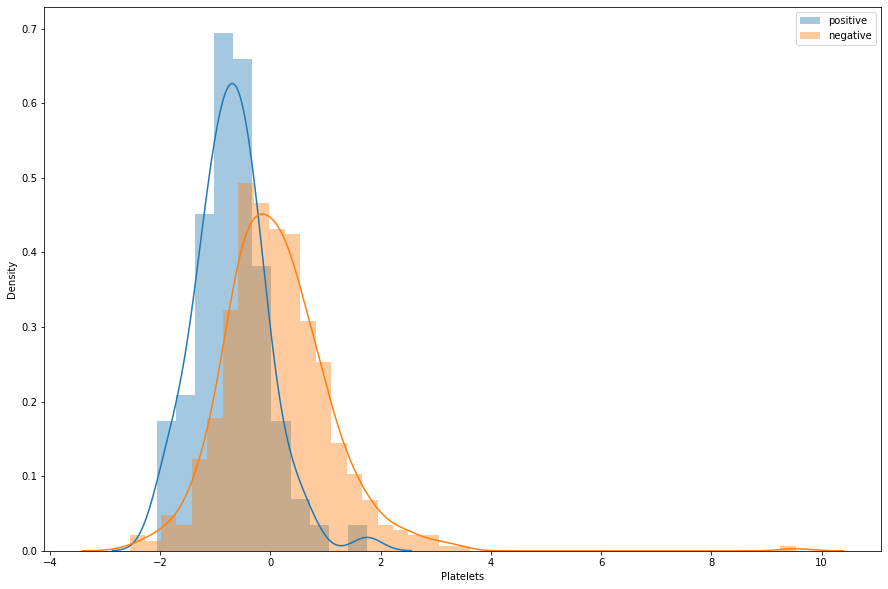

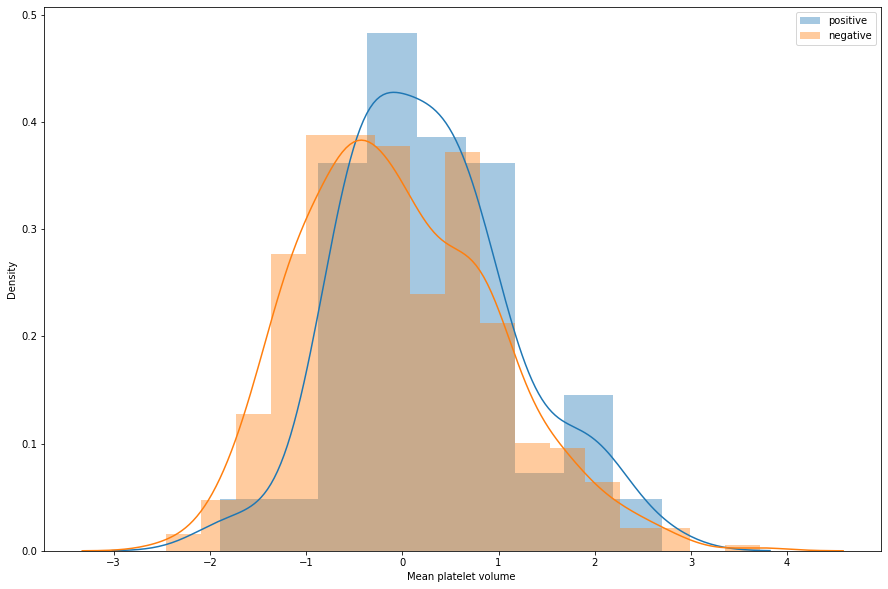

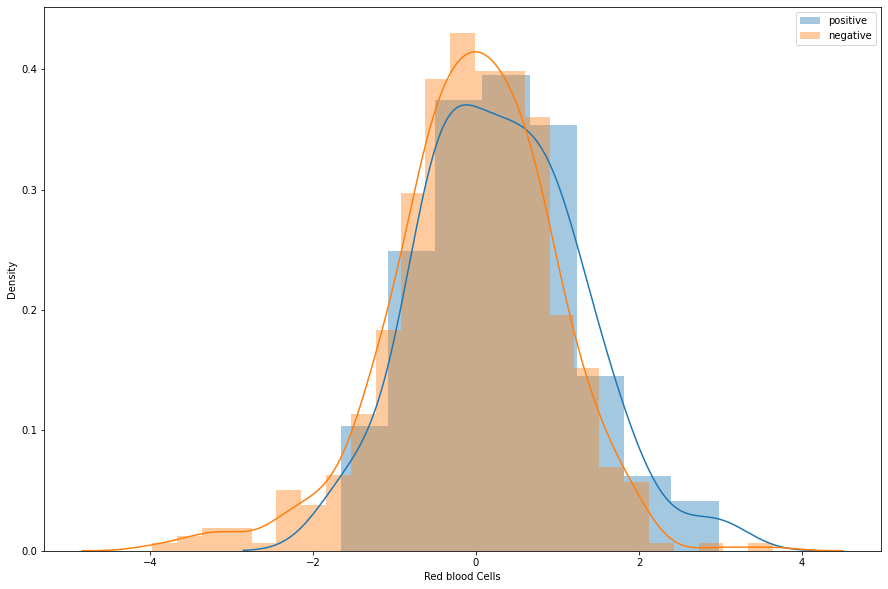

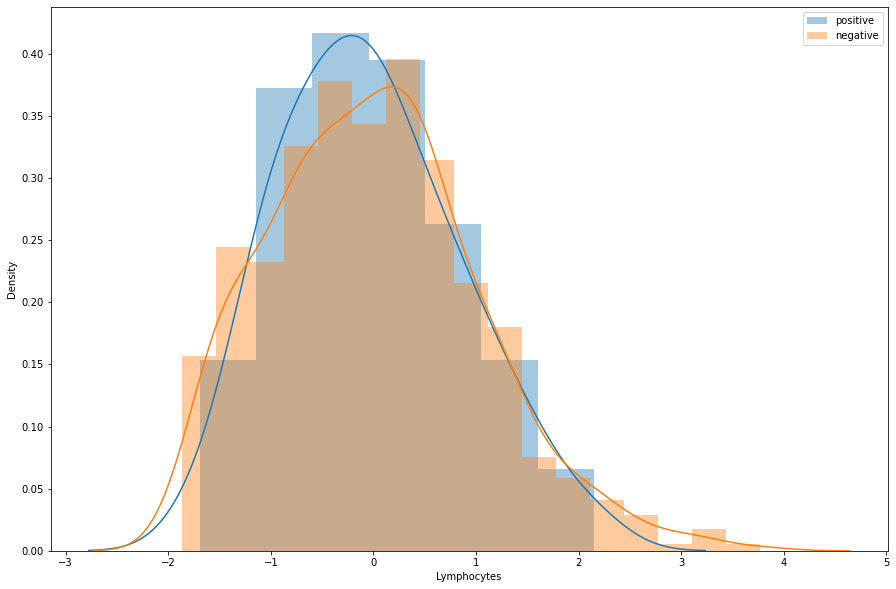

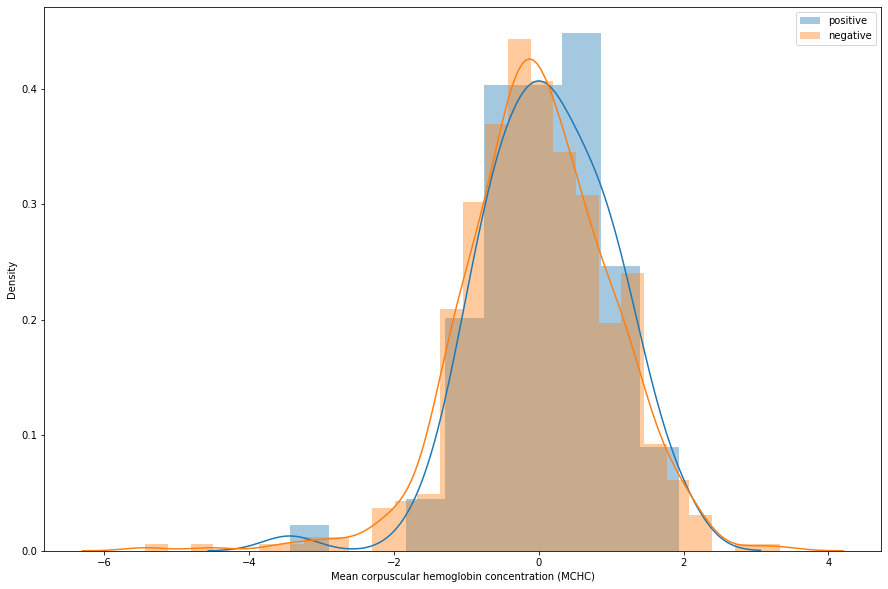

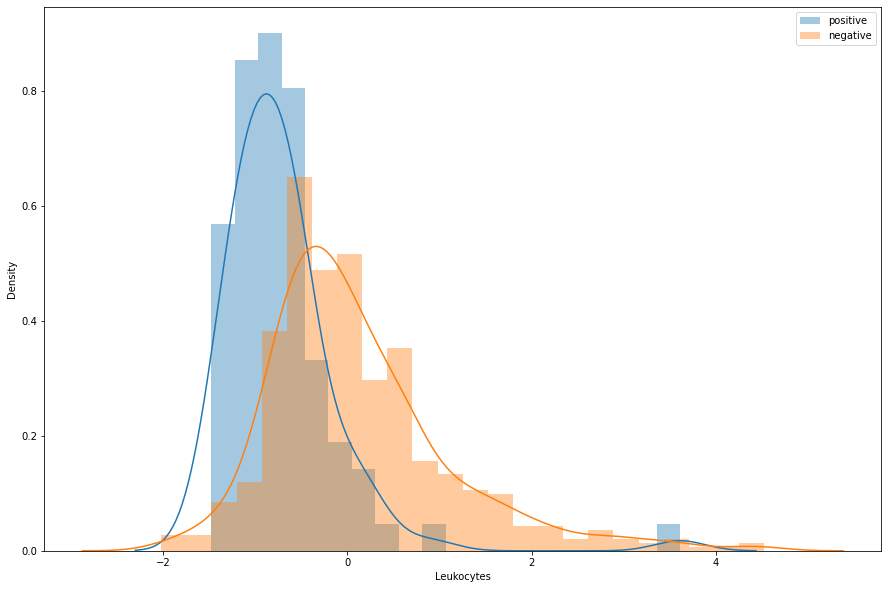

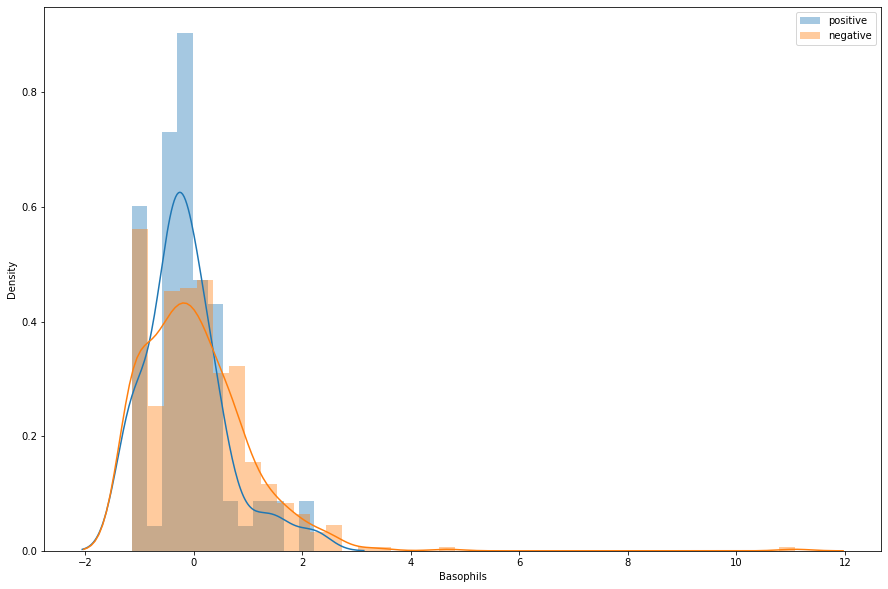

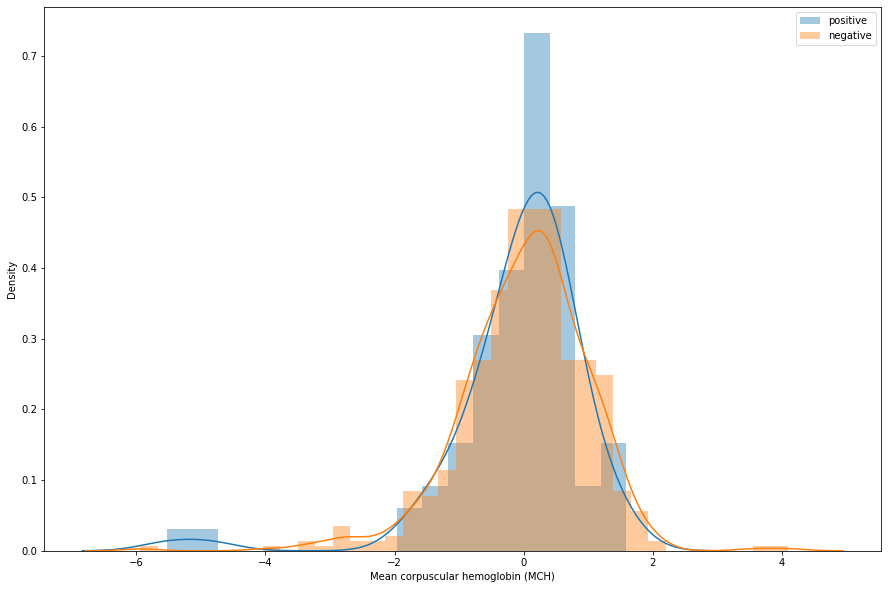

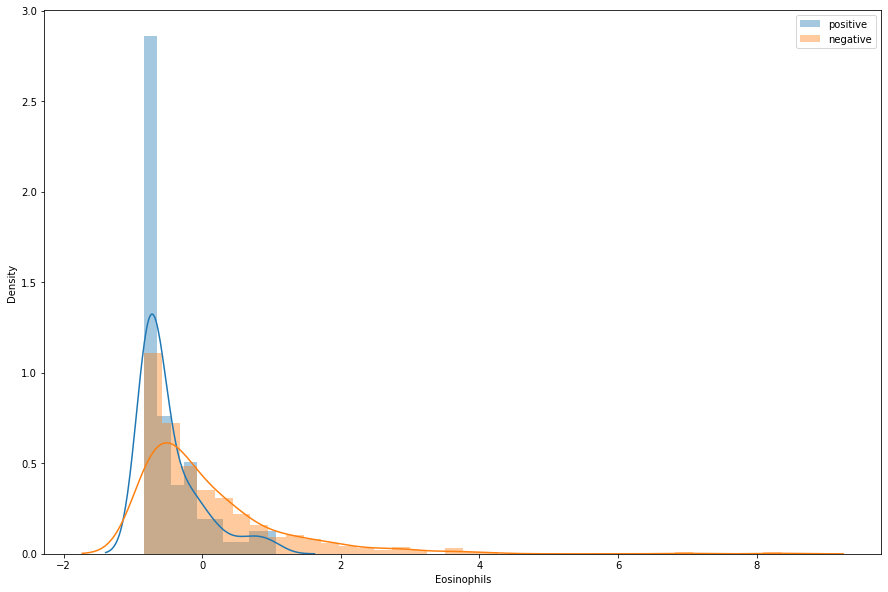

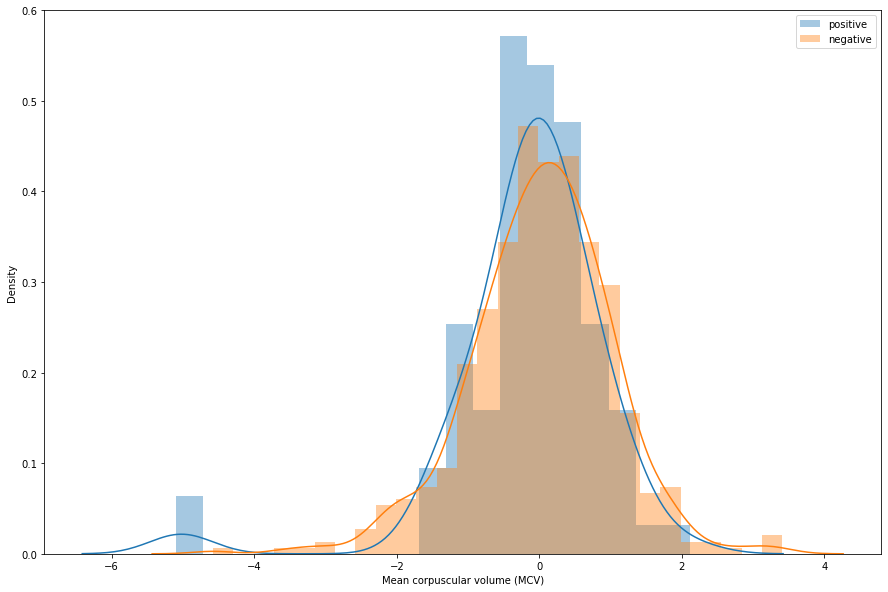

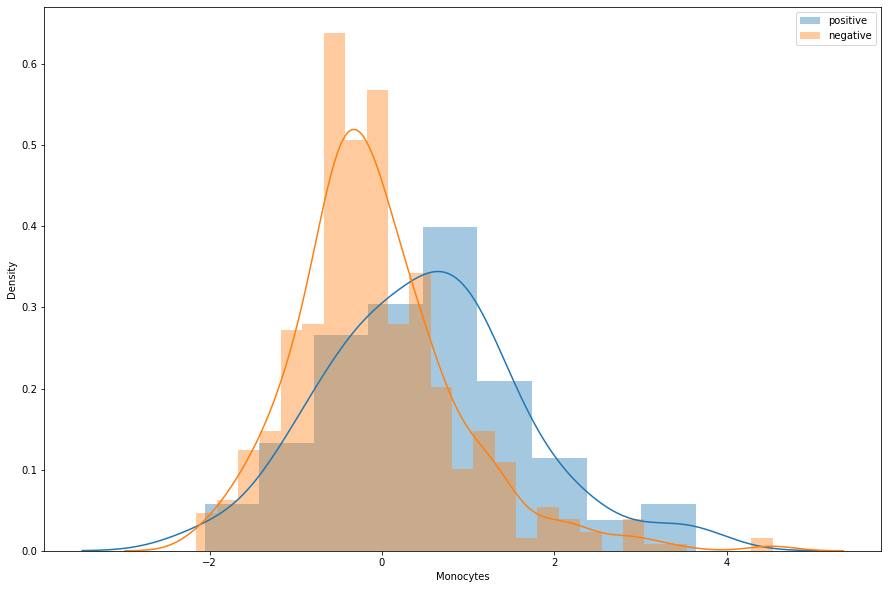

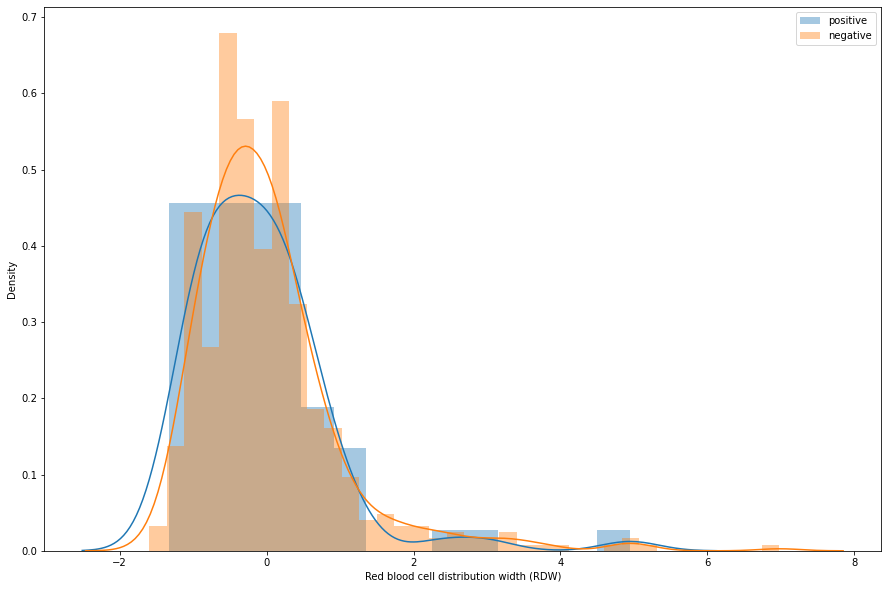

In [181]:
for col in blood_columns:
    plt.figure(figsize=(15,10))
    sns.distplot(positif_df[col],label='positive')
    sns.distplot(negatif_df[col],label='negative')
    plt.legend()

# relation TARGET / age

<AxesSubplot:xlabel='Patient age quantile', ylabel='count'>

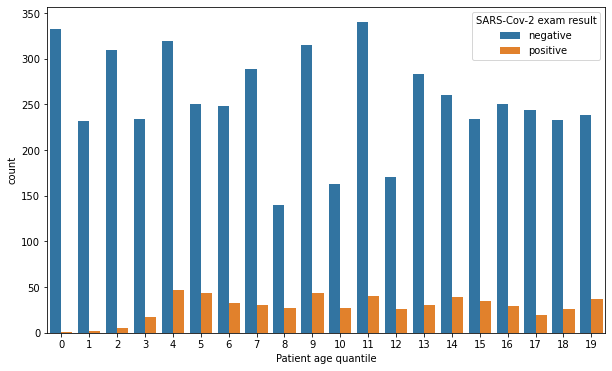

In [183]:
plt.figure(figsize=(10,6))
sns.countplot(x='Patient age quantile',hue='SARS-Cov-2 exam result',data=df)

# RELATION TARGET / VIRAL

In [184]:
# pour comparer de catogeriie en utulise crosstab

pd.crosstab(df['SARS-Cov-2 exam result'],df['Influenza A'])

Influenza A             detected  not_detected
SARS-Cov-2 exam result                        
negative                      18          1224
positive                       0           112

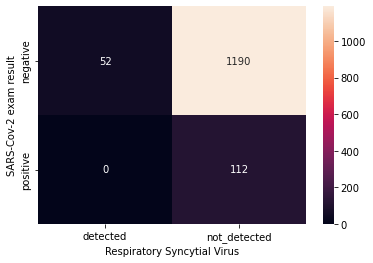

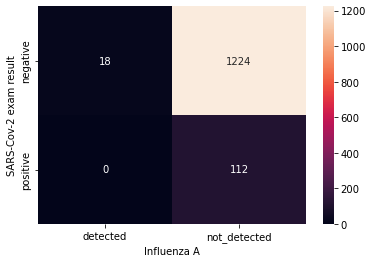

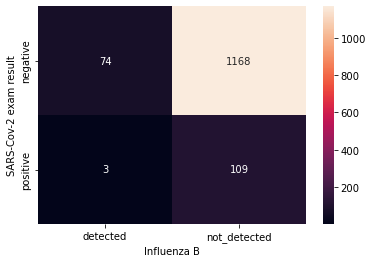

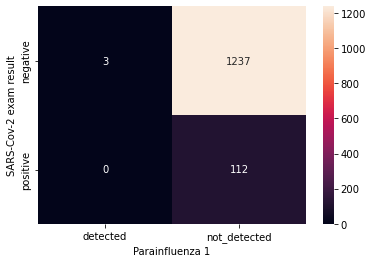

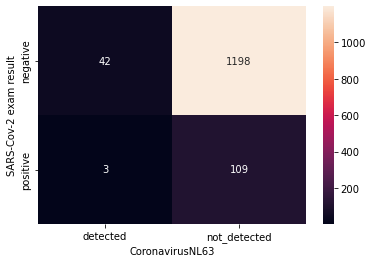

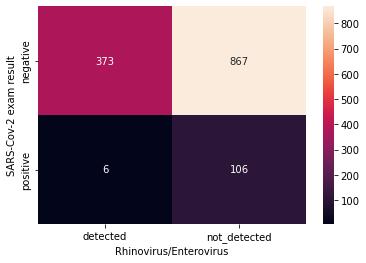

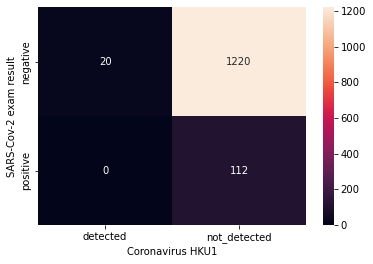

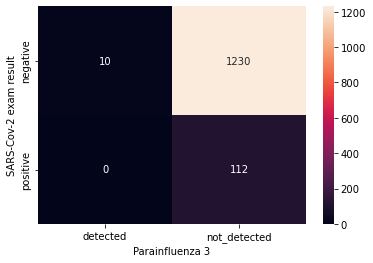

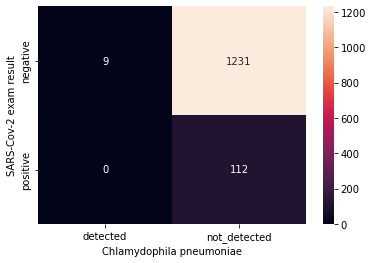

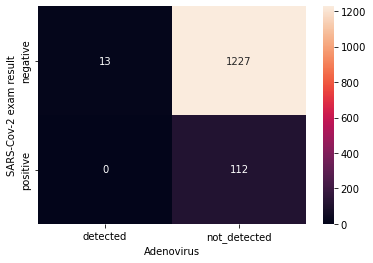

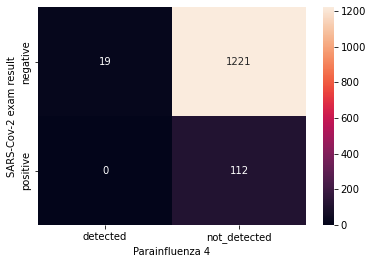

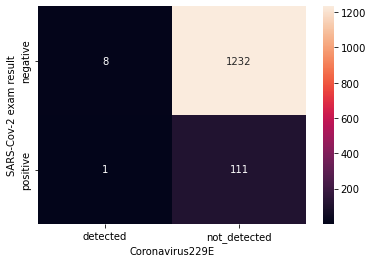

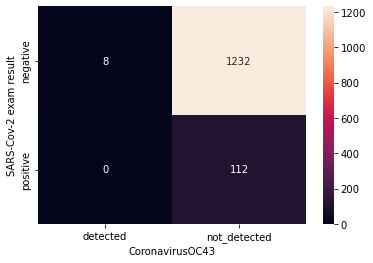

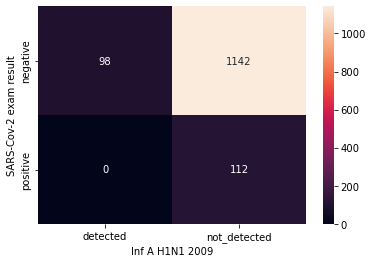

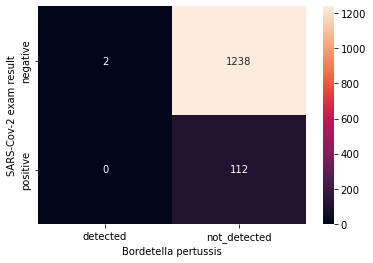

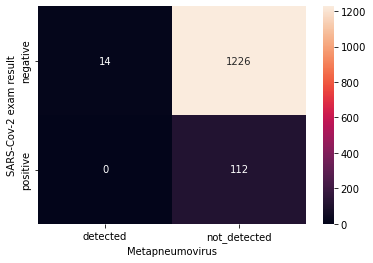

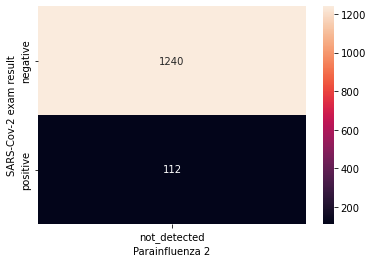

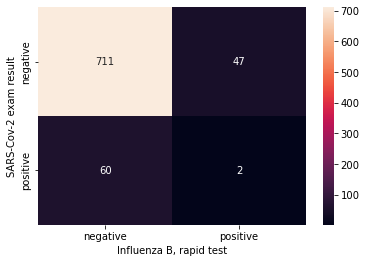

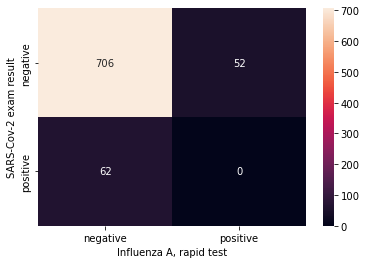

In [186]:
for col in viral_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df['SARS-Cov-2 exam result'],df[col]),annot=True,fmt='d')

# Analyse in peu plus avancee
## Relation var / var

        relationtaux sanguin

In [188]:
blood_columns

Index(['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ',
       'Red blood Cells', 'Lymphocytes',
       'Mean corpuscular hemoglobin concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
       'Mean corpuscular volume (MCV)', 'Monocytes',
       'Red blood cell distribution width (RDW)'],
      dtype='object')

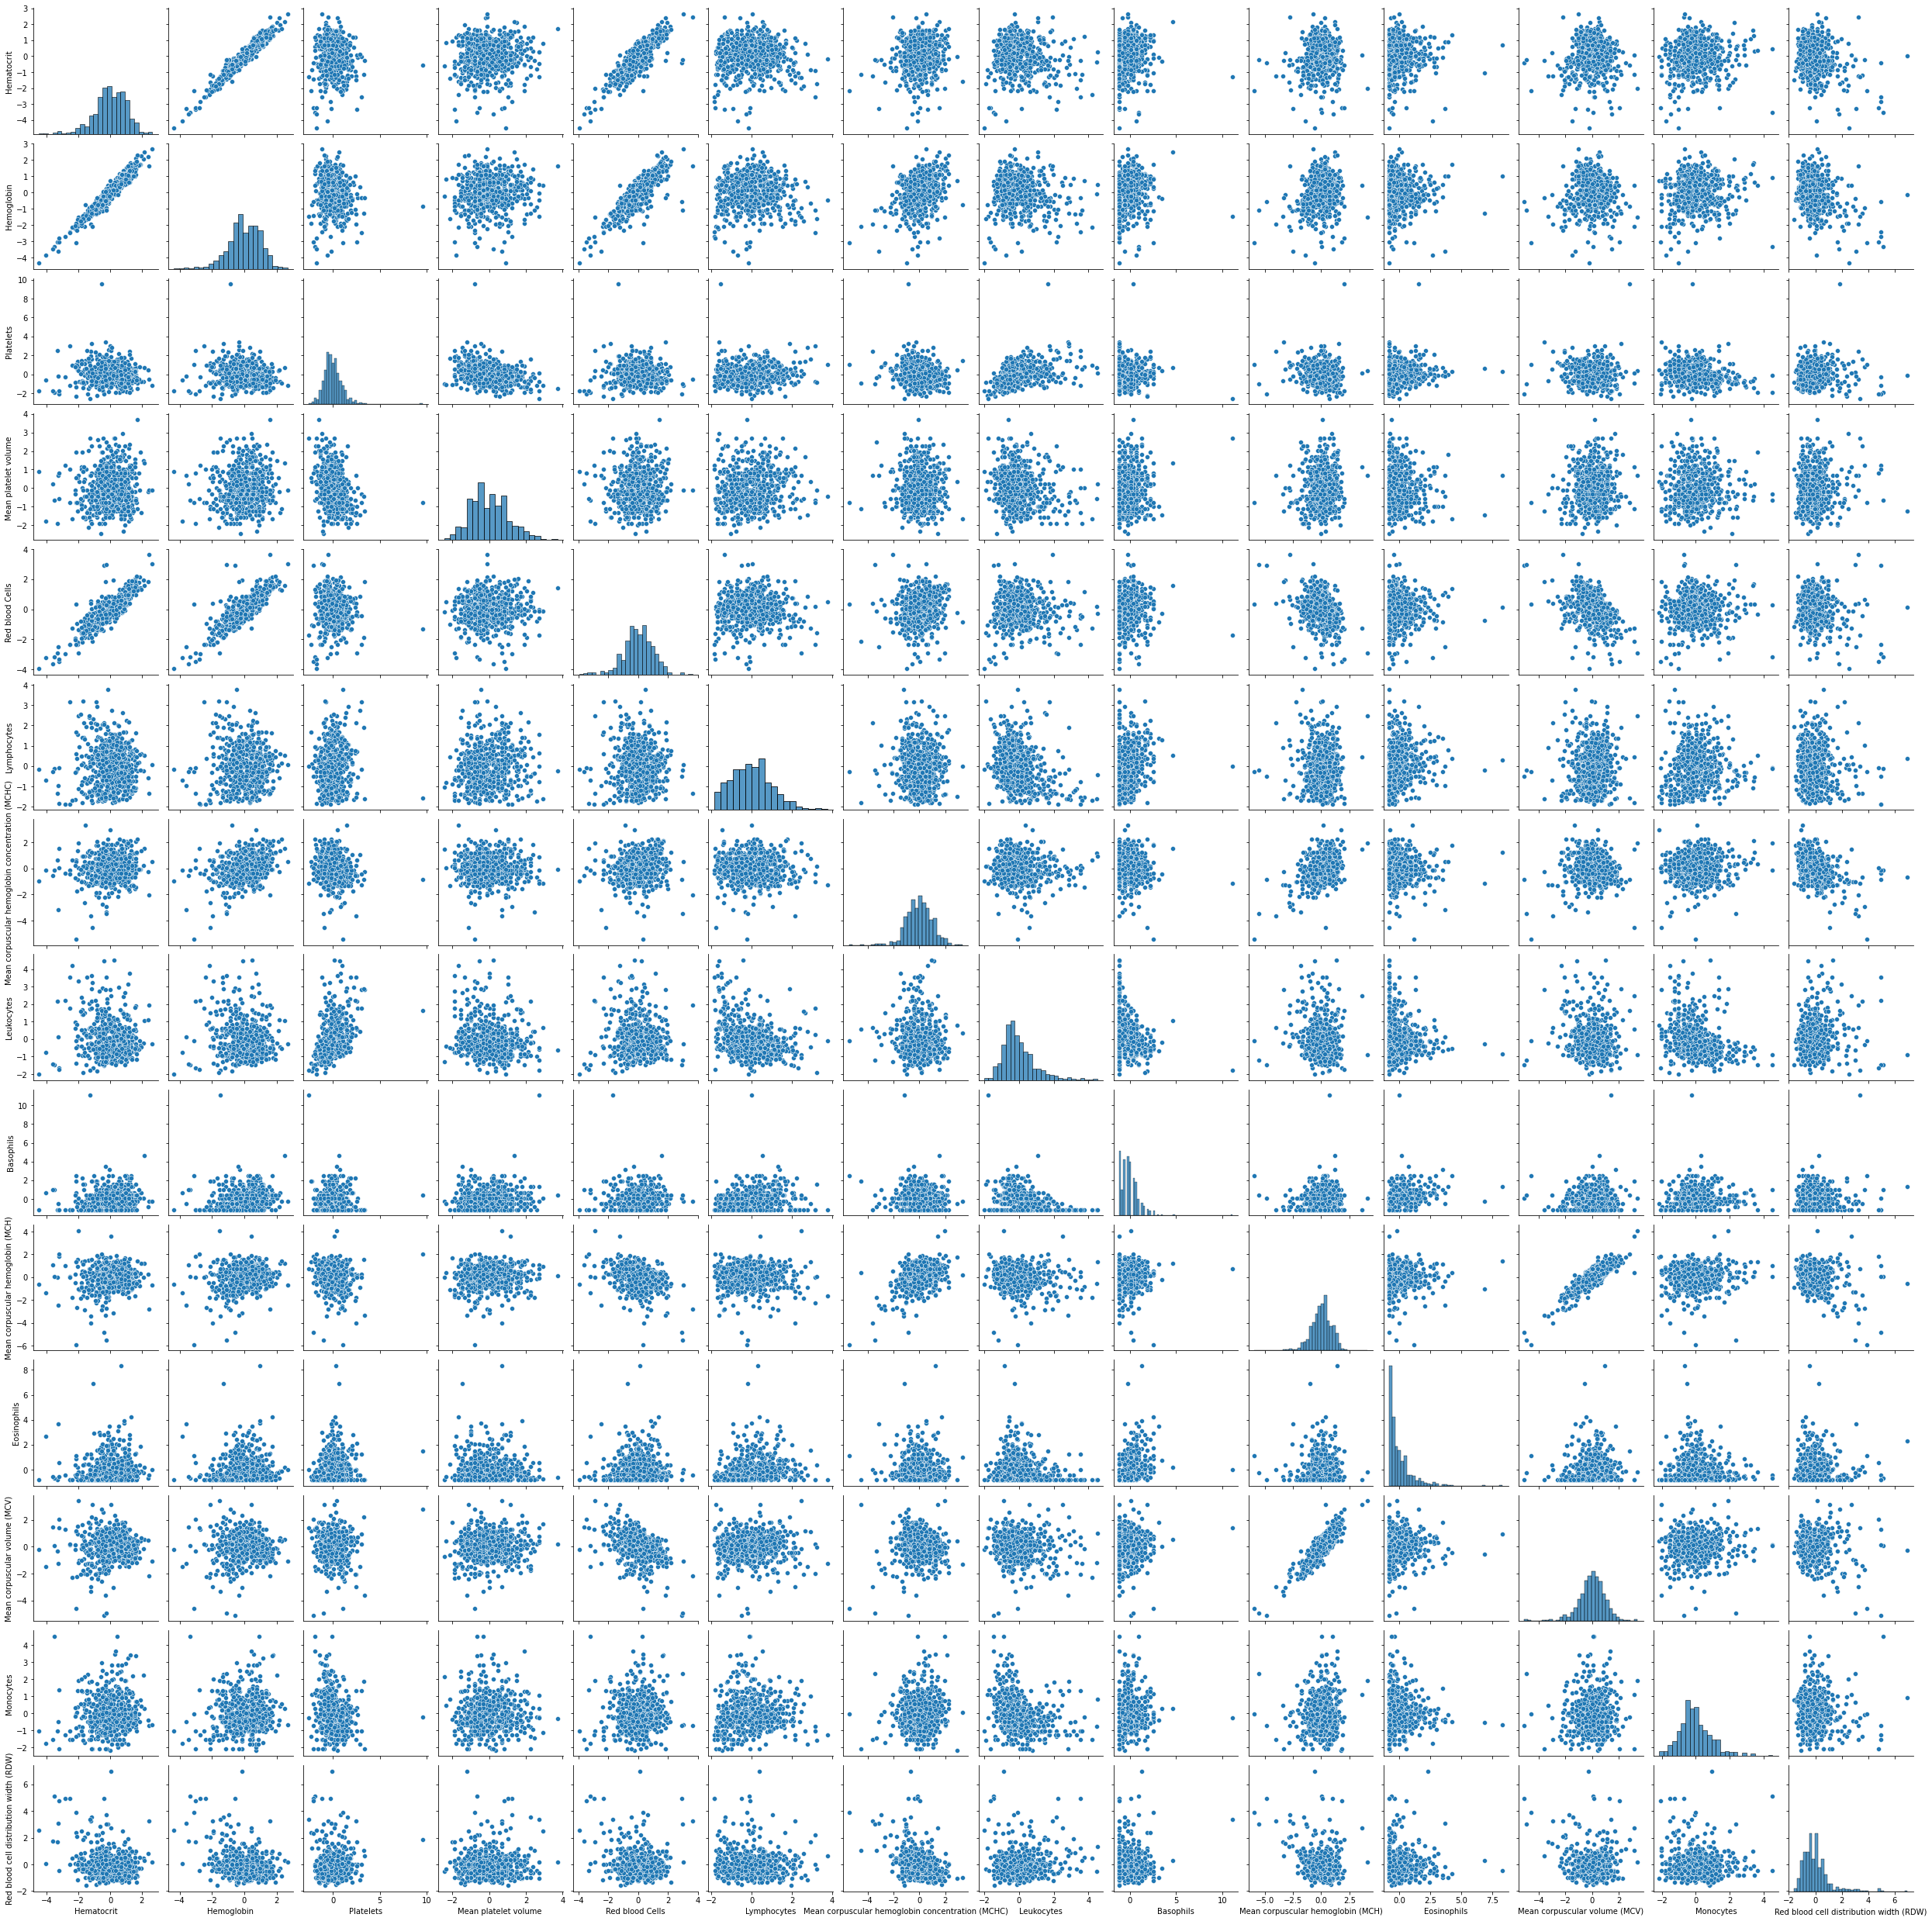

In [187]:
sns.pairplot(df[blood_columns])

<AxesSubplot:>

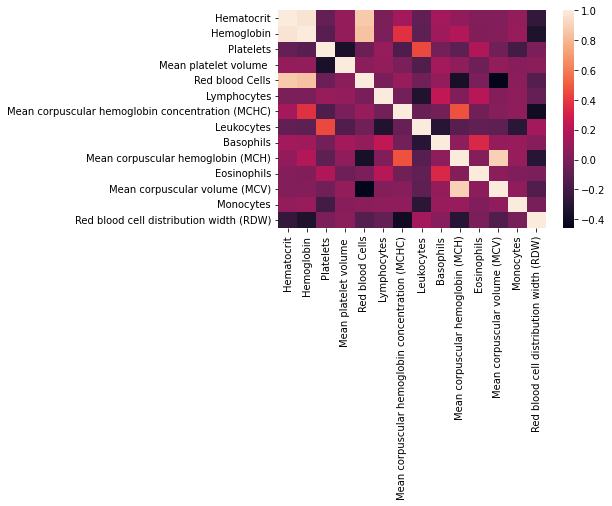

In [189]:
sns.heatmap(df[blood_columns].corr())

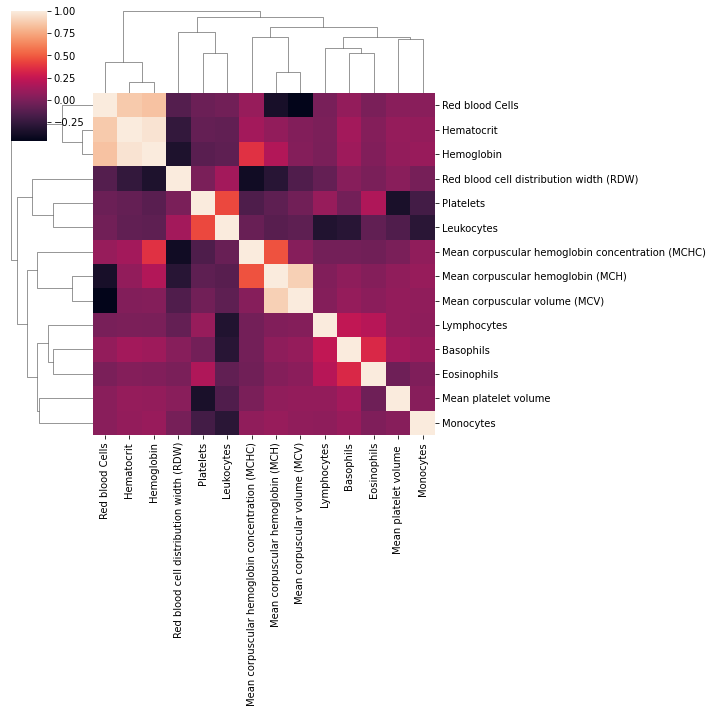

In [190]:
sns.clustermap(df[blood_columns].corr())

# Relation age /sang

C:\Users\HP\AppData\Local\Temp/ipykernel_17920/3146663484.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

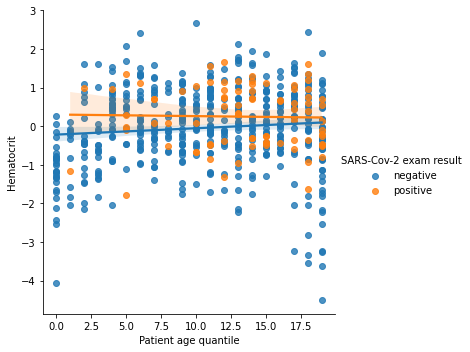

<Figure size 432x288 with 0 Axes>

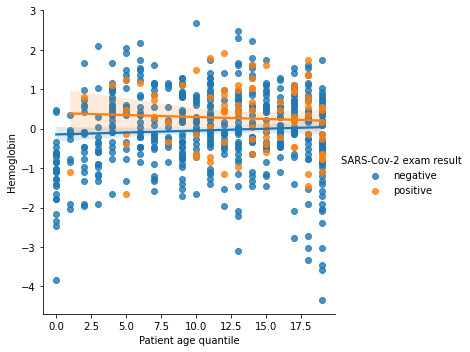

<Figure size 432x288 with 0 Axes>

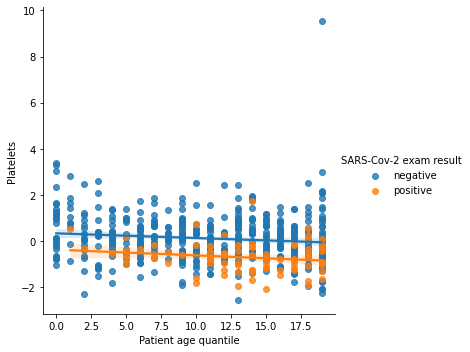

<Figure size 432x288 with 0 Axes>

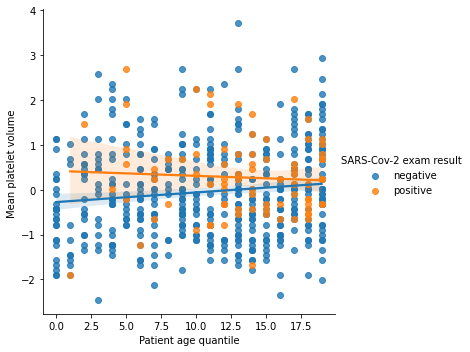

<Figure size 432x288 with 0 Axes>

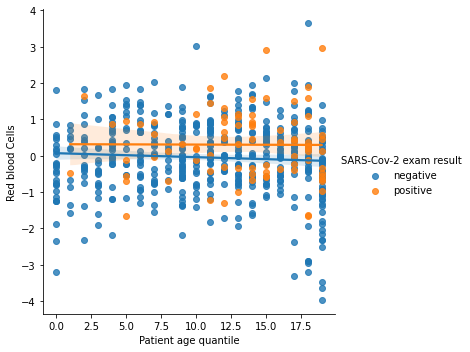

<Figure size 432x288 with 0 Axes>

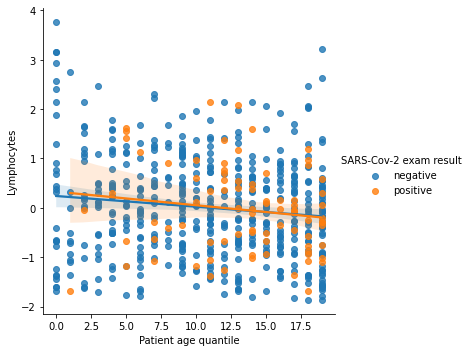

<Figure size 432x288 with 0 Axes>

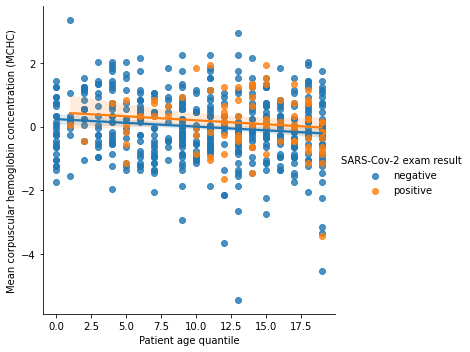

<Figure size 432x288 with 0 Axes>

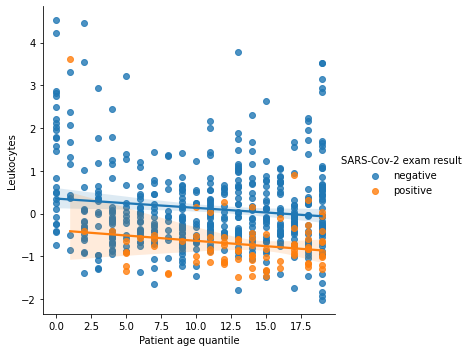

<Figure size 432x288 with 0 Axes>

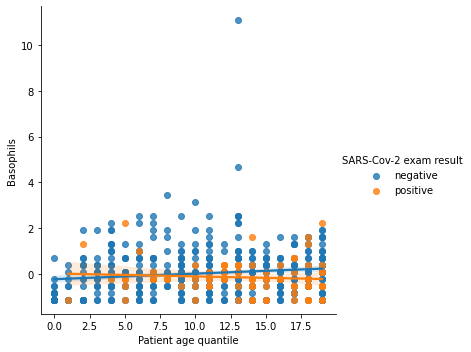

<Figure size 432x288 with 0 Axes>

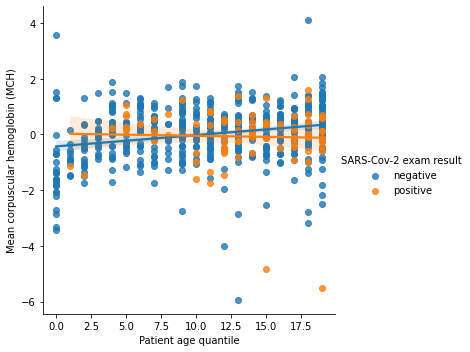

<Figure size 432x288 with 0 Axes>

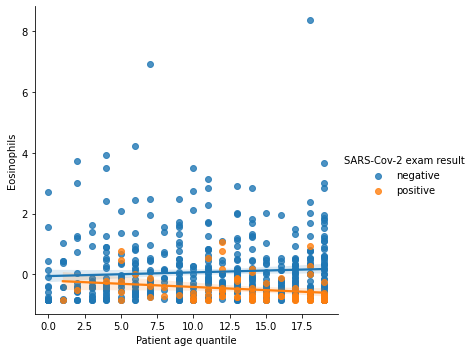

<Figure size 432x288 with 0 Axes>

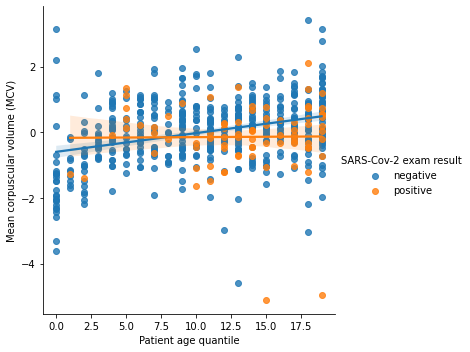

<Figure size 432x288 with 0 Axes>

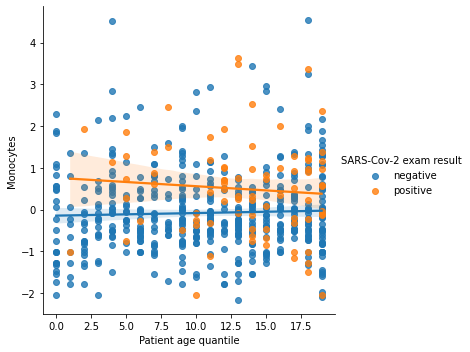

<Figure size 432x288 with 0 Axes>

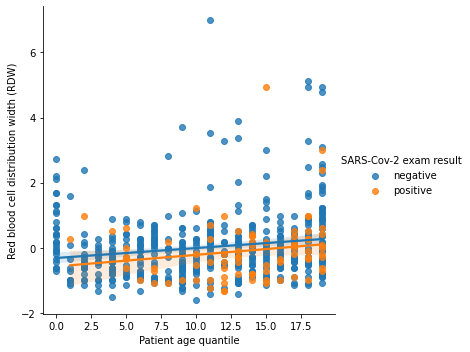

In [191]:


for col in blood_columns:
    plt.figure()
    sns.lmplot(x='Patient age quantile',y=col,hue='SARS-Cov-2 exam result',data=df)

In [195]:
df.corr()['Patient age quantile'].sort_values()

Leukocytes                                              -0.166386
Platelets                                               -0.158683
Lymphocytes                                             -0.125935
Mean corpuscular hemoglobin concentration (MCHC)        -0.124671
Red blood Cells                                         -0.037510
Patient addmited to intensive care unit (1=yes, 0=no)   -0.035772
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.015736
Eosinophils                                              0.022085
Patient addmited to regular ward (1=yes, 0=no)           0.046166
Monocytes                                                0.050962
Hemoglobin                                               0.060320
Hematocrit                                               0.096808
Basophils                                                0.107525
Mean platelet volume                                     0.119449
Red blood cell distribution width (RDW)                  0.166429
Mean corpu

In [196]:
pd.crosstab(df['Influenza A'],df['Influenza A, rapid test'])

Influenza A, rapid test  negative  positive
Influenza A                                
detected                        2         4
not_detected                  245        15

In [197]:
pd.crosstab(df['Influenza B'],df['Influenza B, rapid test'])

Influenza B, rapid test  negative  positive
Influenza B                                
detected                       18        11
not_detected                  233         4

In [203]:
df['est malade']=np.sum(df[viral_columns[:-2]]=='detected',axis=1) >=1

In [204]:
df.head()

Patient age quantile SARS-Cov-2 exam result  \
Patient ID                                                     
44477f75e8169d2                    13               negative   
126e9dd13932f68                    17               negative   
a46b4402a0e5696                     8               negative   
f7d619a94f97c45                     5               negative   
d9e41465789c2b5                    15               negative   

                 Patient addmited to regular ward (1=yes, 0=no)  \
Patient ID                                                        
44477f75e8169d2                                               0   
126e9dd13932f68                                               0   
a46b4402a0e5696                                               0   
f7d619a94f97c45                                               0   
d9e41465789c2b5                                               0   

                 Patient addmited to semi-intensive unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Patient addmited to intensive care unit (1=yes, 0=no)  \
Patient ID                                                               
44477f75e8169d2                                                  0       
126e9dd13932f68                                                  0       
a46b4402a0e5696                                                  0       
f7d619a94f97c45                                                  0       
d9e41465789c2b5                                                  0       

                 Hematocrit  Hemoglobin  Platelets  Mean platelet volume   \
Patient ID                                                                  
44477f75e8169d2         NaN         NaN        NaN                    NaN   
126e9dd13932f68    0.236515    -0.02234  -0.517413               0.010677   
a46b4402a0e5696         NaN         NaN        NaN                    NaN   
f7d619a94f97c45         NaN         NaN        NaN                    NaN   
d9e41465789c2b5         NaN         NaN        NaN                    NaN   

                 Red blood Cells  ...  Parainfluenza 4  Coronavirus229E  \
Patient ID                        ...                                     
44477f75e8169d2              NaN  ...              NaN              NaN   
126e9dd13932f68         0.102004  ...     not_detected     not_detected   
a46b4402a0e5696              NaN  ...              NaN              NaN   
f7d619a94f97c45              NaN  ...              NaN              NaN   
d9e41465789c2b5              NaN  ...     not_detected     not_detected   

                 CoronavirusOC43  Inf A H1N1 2009  Bordetella pertussis  \
Patient ID                                                                
44477f75e8169d2              NaN              NaN                   NaN   
126e9dd13932f68     not_detected     not_detected          not_detected   
a46b4402a0e5696              NaN              NaN                   NaN   
f7d619a94f97c45              NaN              NaN                   NaN   
d9e41465789c2b5     not_detected     not_detected          not_detected   

                 Metapneumovirus  Parainfluenza 2  Influenza B, rapid test  \
Patient ID                                                                   
44477f75e8169d2              NaN              NaN                      NaN   
126e9dd13932f68     not_detected     not_detected                 negative   
a46b4402a0e5696              NaN              NaN                      NaN   
f7d619a94f97c45              NaN              NaN                      NaN   


In [205]:
malade_df = df[df['est malade']==True]
non_malade_df = df[df['est malade']==False]

d:\programe\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\programe\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\programe\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

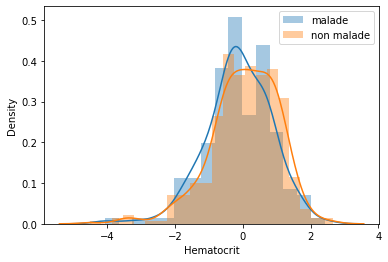

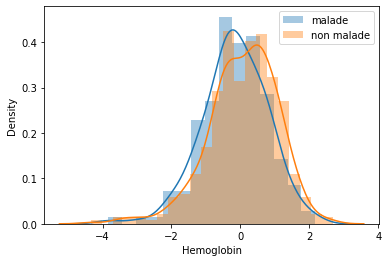

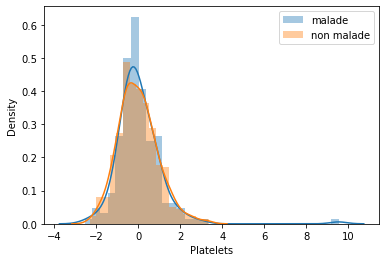

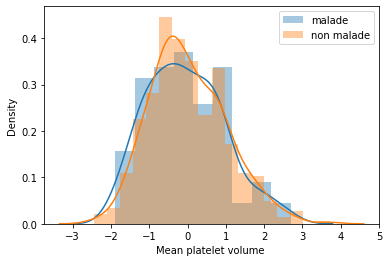

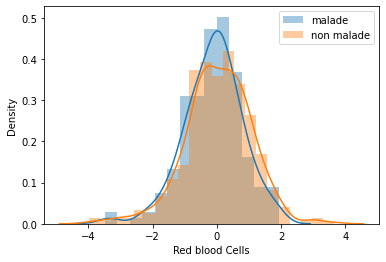

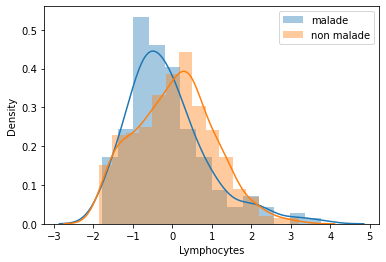

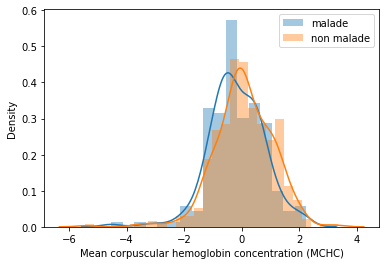

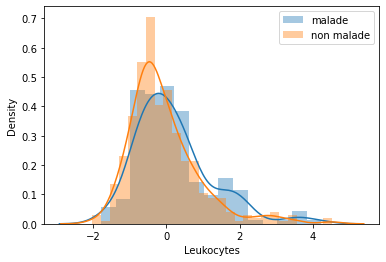

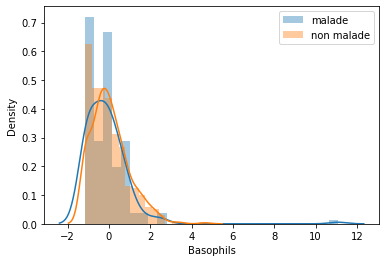

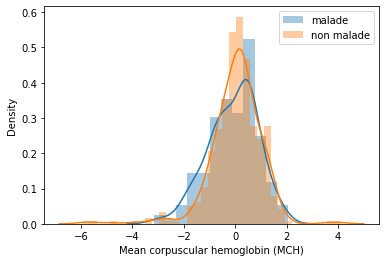

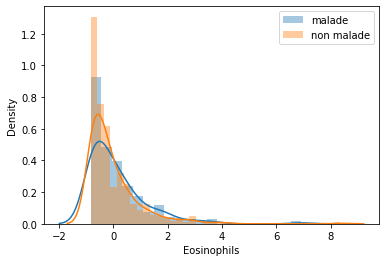

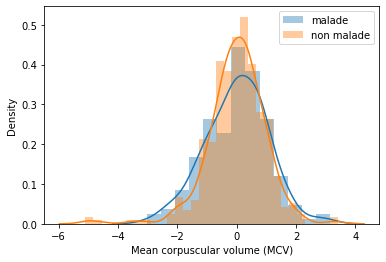

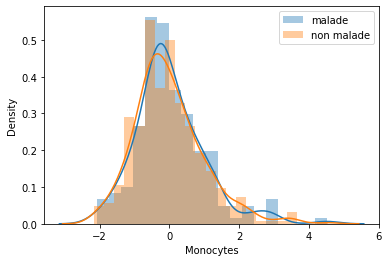

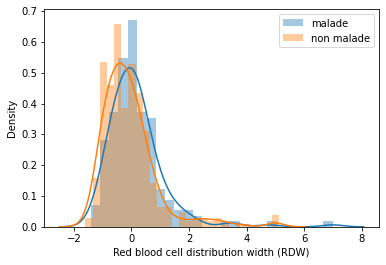

In [206]:
for col in blood_columns:
    plt.figure()
    sns.distplot(malade_df[col],label='malade')
    sns.distplot(non_malade_df[col],label='non malade')
    plt.legend()

In [221]:
def hosp(df):
    if df['Patient addmited to regular ward (1=yes, 0=no)']==1:
        return 'surveillance'
    elif df['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1:
        return 'soins semi-intensive'
    elif df['Patient addmited to intensive care unit (1=yes, 0=no)']==1:
        return'soins intensive'
    else:
        return 'inconni'

In [223]:
df['status']=df.apply(hosp,axis=1)

d:\programe\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\programe\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\programe\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

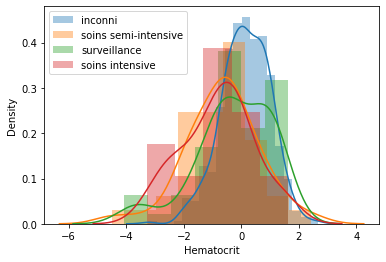

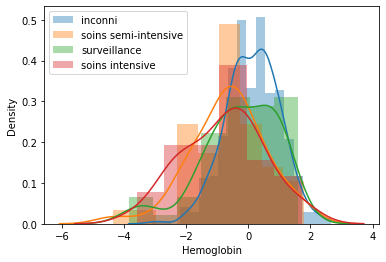

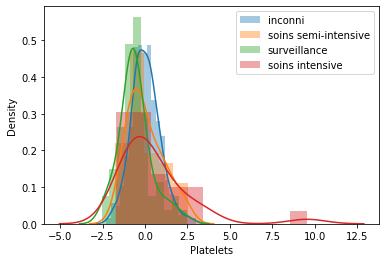

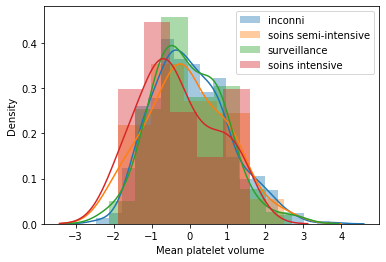

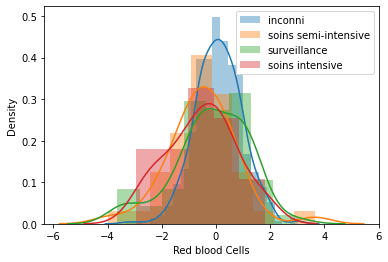

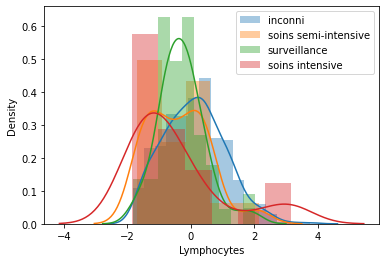

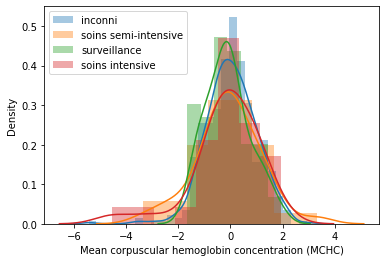

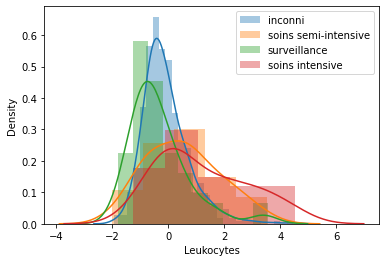

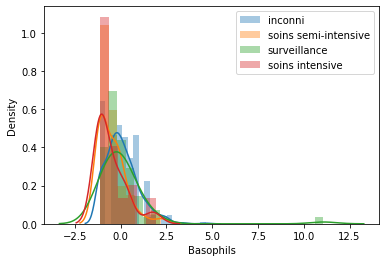

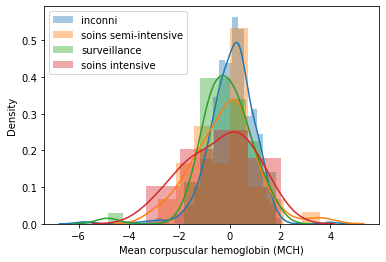

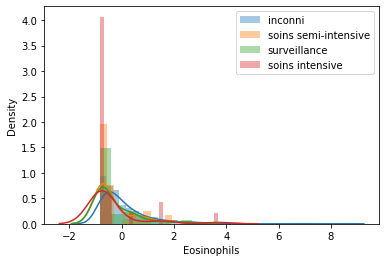

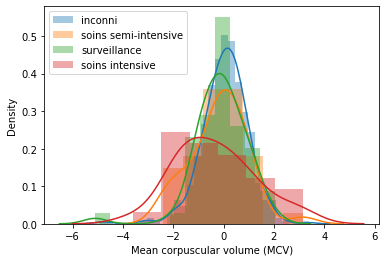

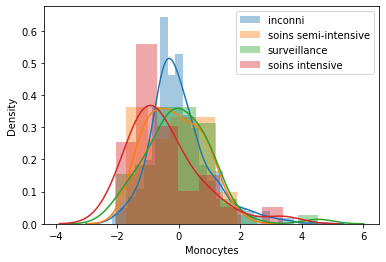

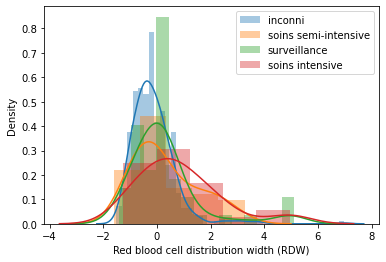

In [228]:
for col in blood_columns:
    plt.figure()
    for cat in df['status'].unique():
        sns.distplot(df[df['status']==cat][col],label=cat)
    plt.legend()


In [231]:
df[viral_columns].count()

Respiratory Syncytial Virus    1354
Influenza A                    1354
Influenza B                    1354
Parainfluenza 1                1352
CoronavirusNL63                1352
Rhinovirus/Enterovirus         1352
Coronavirus HKU1               1352
Parainfluenza 3                1352
Chlamydophila pneumoniae       1352
Adenovirus                     1352
Parainfluenza 4                1352
Coronavirus229E                1352
CoronavirusOC43                1352
Inf A H1N1 2009                1352
Bordetella pertussis           1352
Metapneumovirus                1352
Parainfluenza 2                1352
Influenza B, rapid test         820
Influenza A, rapid test         820
dtype: int64

In [238]:
from scipy.stats import ttest_ind
# preferable d'avoir classe balancer entre diff classes pour cela on vas echantilloner poue le balancer
balanced_ned=negatif_df.sample(positif_df.shape[0])

In [239]:
def t_test(col):
    alpha=0.02
    stat,p=ttest_ind(balanced_ned[col].dropna(),positif_df[col].dropna())
    if p<alpha:
        return 'H0 Rejetee'
    else :
        return 0

In [240]:
for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')

Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- 0
Platelets----------------------------------------- H0 Rejetee
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetee
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetee
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- 0
Red blood cell distribution width (RDW)----------- 0


# Preprocesing
    encodeage
    normalisation
    nettoiyage outliers
    nettoyage nan 
    eauture selection
    feauture extraction

In [409]:
df=data.copy()

In [410]:
missing_rate =df.isna().sum()/df.shape[0]

In [411]:
blood_columns=list(df.columns[(missing_rate<0.9)& (missing_rate > 0.88)])
viral_columns=list(df.columns[(missing_rate<0.8)& (missing_rate > 0.75)])

In [412]:
key_columns = ['Patient age quantile','SARS-Cov-2 exam result']

In [413]:
df=df[key_columns+viral_columns+blood_columns]

In [414]:
from sklearn.model_selection import train_test_split

In [415]:
trainset , testset = train_test_split(df,test_size=0.2,random_state=0)

In [416]:
trainset['SARS-Cov-2 exam result'].value_counts()

negative    4068
positive     447
Name: SARS-Cov-2 exam result, dtype: int64

In [417]:
testset['SARS-Cov-2 exam result'].value_counts()

negative    1018
positive     111
Name: SARS-Cov-2 exam result, dtype: int64

ENCODAGE

In [418]:
def encodage(df):
        code = {'positive':1,
                'negative':0,
                'detected':1,
                'not_detected':0}
        for col in df.select_dtypes('object'):
           df[col] = df[col].map(code)
        return df
df=encodage(df)

In [438]:
def feature_engineering(df):
    df['est malade']= df[viral_columns].sum(axis=1)>=1
    df =df.drop(viral_columns,axis=1)
    return df

In [439]:
def imputation(df):
   # df['is na ']= (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df=df.fillna(-999)
    df=df.dropna(axis=0)
    return df

In [440]:


def preprocessing(df):
    df=encodage(df)
    df=feature_engineering(df)
    df=imputation(df)


    x=df.drop('SARS-Cov-2 exam result',axis=1)
    y=df['SARS-Cov-2 exam result']
    print(y.value_counts())

    return x,y

In [441]:
x_train , y_train = preprocessing(trainset)

0    422
1     65
Name: SARS-Cov-2 exam result, dtype: int64


C:\Users\HP\AppData\Local\Temp/ipykernel_17920/1525106337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade']= df[viral_columns].sum(axis=1)>=1


In [442]:
x_test , y_test = preprocessing(testset)

C:\Users\HP\AppData\Local\Temp/ipykernel_17920/1525106337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['est malade']= df[viral_columns].sum(axis=1)>=1


0    95
1    16
Name: SARS-Cov-2 exam result, dtype: int64


# Modelisation

In [489]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # ce model il lutte contre l'overfiting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.decomposition import PCA

In [497]:
preprocessor = make_pipeline(PolynomialFeatures(2,include_bias=False),SelectKBest(f_classif,k=10))

In [491]:
RandomForest = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
Adaboost = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor,StandardScaler(),SVC(random_state=0)) # necisite normalisation
KNN = make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())


In [502]:
dict_of_models={'RandomForest':RandomForest,
                'Adaboost':Adaboost,
                'SVM':SVM,
                'KNN':KNN
                }

RandomForest


d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\featu

Adaboost
[[91  4]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        95
           1       0.64      0.44      0.52        16

    accuracy                           0.88       111
   macro avg       0.77      0.70      0.73       111
weighted avg       0.87      0.88      0.87       111



d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\featu

SVM
[[92  3]
 [10  6]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        95
           1       0.67      0.38      0.48        16

    accuracy                           0.88       111
   macro avg       0.78      0.67      0.71       111
weighted avg       0.87      0.88      0.87       111



d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\featu

KNN
[[88  7]
 [ 8  8]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        95
           1       0.53      0.50      0.52        16

    accuracy                           0.86       111
   macro avg       0.72      0.71      0.72       111
weighted avg       0.86      0.86      0.86       111



d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\featu

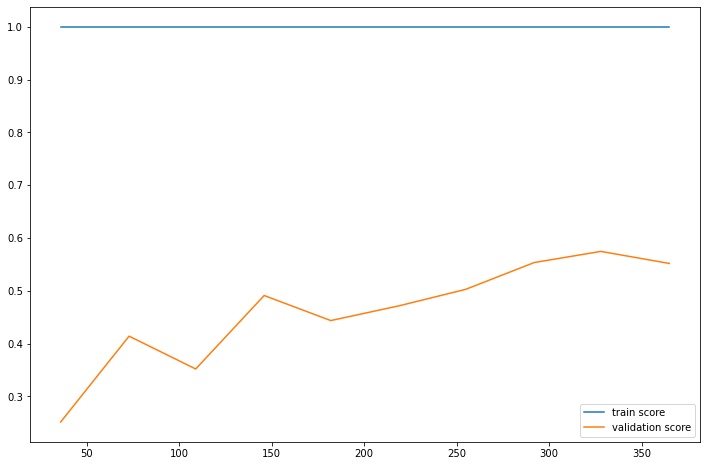

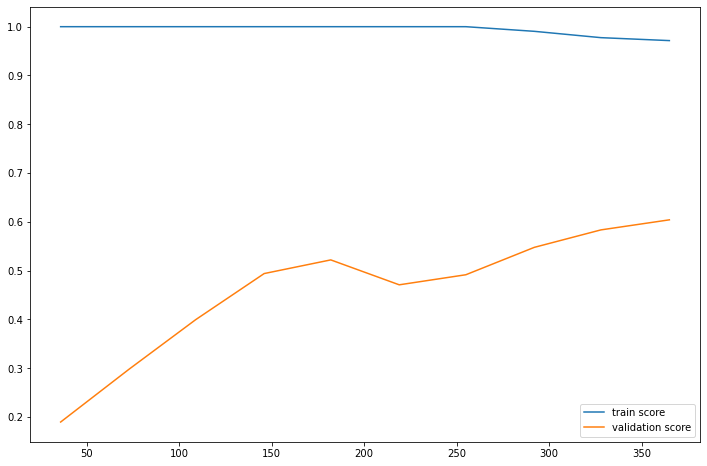

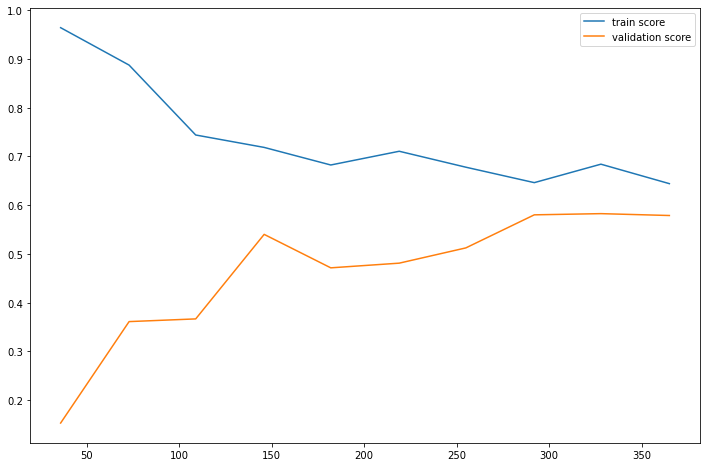

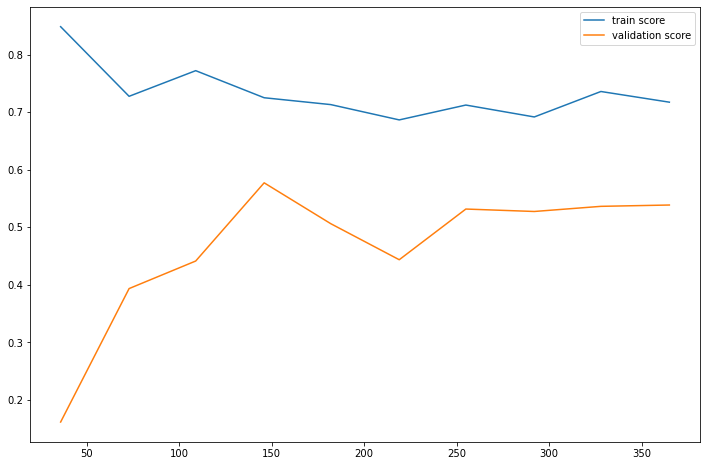

In [505]:
for name,model in dict_of_models.items():
    print(name)
    evaluation(model)

# Procedure d'evaluation

In [478]:
from sklearn.metrics import f1_score , confusion_matrix , classification_report
from sklearn.model_selection import learning_curve

In [479]:


def evaluation(model):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)

    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))

    N , train_score , val_score = learning_curve(model,x_train,y_train,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))

    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()

d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[91  4]
 [11  5]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        95
           1       0.56      0.31      0.40        16

    accuracy                           0.86       111
   macro avg       0.72      0.64      0.66       111
weighted avg       0.84      0.86      0.85       111



d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\featu

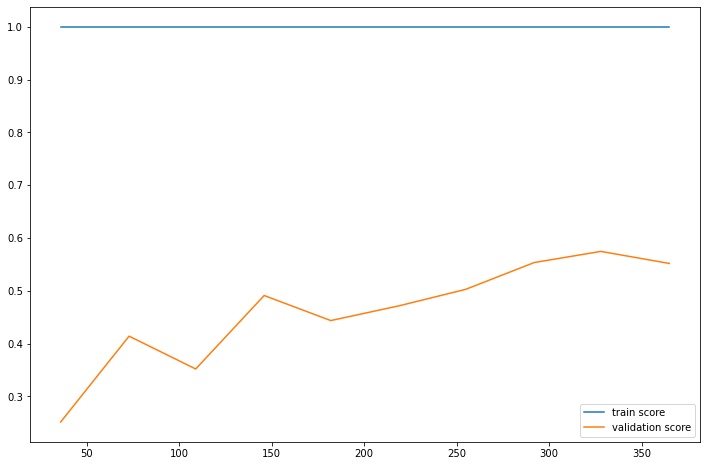

In [480]:
evaluation(model)

# OPTIMIZATIONS

In [515]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [507]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [522]:
hyper_parms = {
    'svc__gamma' : [1e-3,1e-4],
    'svc__C':[1,10,100,1000],
    'pipeline__polynomialfeatures__degree':[2,3,4],
    'pipeline__selectkbest__k':range(40,60),
}

In [523]:
grid = RandomizedSearchCV(SVM,hyper_parms,scoring='recall',cv=4,n_iter=40)


grid.fit(x_train,y_train)
print(grid.best_params_)
y_pred =grid.predict(x_test)

print(classification_report(y_test,y_pred))

d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\featu

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 50, 'pipeline__polynomialfeatures__degree': 3}
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111



d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\featu

[[90  5]
 [ 9  7]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        95
           1       0.58      0.44      0.50        16

    accuracy                           0.87       111
   macro avg       0.75      0.69      0.71       111
weighted avg       0.86      0.87      0.87       111



d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
d:\programe\anaconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
d:\programe\anaconda\lib\site-packages\sklearn\featu

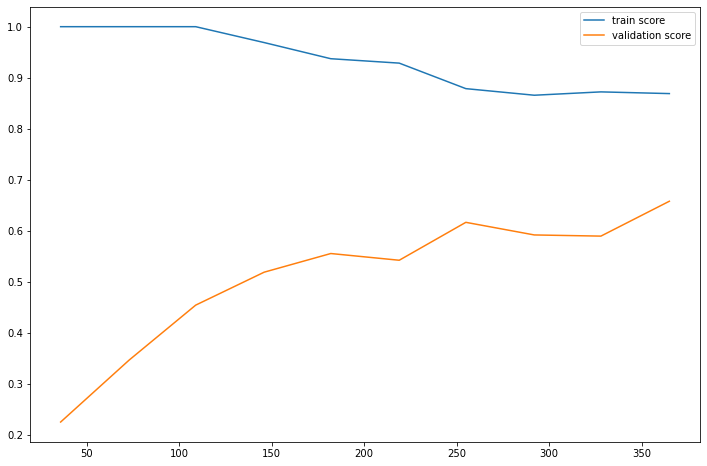

In [524]:
evaluation(grid.best_estimator_)

# PRECISION RECALL CURVE

In [526]:
from sklearn.metrics import precision_recall_curve

In [528]:
precision,recall , threshold=precision_recall_curve(y_test, grid.best_estimator_.decision_function(x_test))

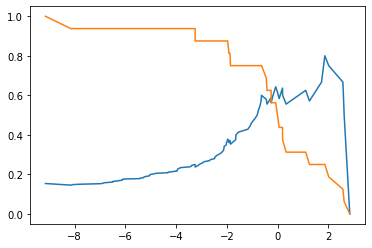

In [529]:
plt.plot(threshold,precision[:-1],label='precision')
plt.plot(threshold,recall[:-1],label='recall')

In [531]:
def model_final(model,X,threshold=0):
    return model.decision_function(X)> threshold

In [532]:
y_pred = model_final(grid.best_estimator_,x_test,threshold=-1)

In [534]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.75

In [533]:
f1_score(y_test,y_pred)

0.5853658536585366

In [521]:


pd.DataFrame(model.feature_importances_,index=x_train.columns).plot.bar(figsize=(12,8))


# feauture selection est apres SelectKbest pour selectioner les premier k feautures


AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [ ]:
df.shape

(5644, 33)